In [3]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import random

Give me a file name: new
Plz Wait!I'm writing, I have Written:437 words
Plz Wait!I'm writing, I have Written:874 words
Plz Wait!I'm writing, I have Written:1311 words
Plz Wait!I'm writing, I have Written:1748 words
Plz Wait!I'm writing, I have Written:2185 words
Plz Wait!I'm writing, I have Written:2622 words
Plz Wait!I'm writing, I have Written:3059 words
Plz Wait!I'm writing, I have Written:3496 words
Plz Wait!I'm writing, I have Written:3933 words
Plz Wait!I'm writing, I have Written:4370 words
Plz Wait!I'm writing, I have Written:4807 words
Plz Wait!I'm writing, I have Written:5000 words
Done with 5000 Words!
    word_length  probability_in_new_data  probability_in_sample
0             5                   0.1198               0.118993
1             3                   0.1392               0.139588
2             4                   0.1240               0.123570
3             2                   0.1642               0.164760
4            12                   0.0202               0.02

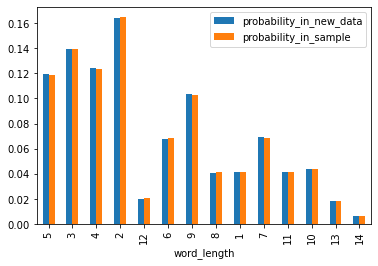

In [4]:
sample_text_file_path= "A:\Probabilistic generative model\Text_sample.txt"

def character_frequency(file):
    counting=dict()
    character_remove= re.sub('[^A-Za-z0-9]+','', file)
    characters = list(character_remove)
    for character in characters:
        if character in counting:
            counting[character] += 1
        else:
            counting[character] =  1
    dict_items = counting.items()
    sort_list= sorted(dict_items)
    dict_list = list(sort_list)
    return dict_list

def slice_word(file):
    words_lens = []
    words =[]
    div_word = file.split()
    for spl in div_word:
        words.append(re.sub('[^a-zA-Z0-9]+', '', spl))
    for word in words:
        words_lens.append(len(word))
    return words_lens

def create_dataframe(path):
    randoms = 0.0
    words_for_sen=[]
    char_for_word = []
    with open(path, "r") as file:
        lines = file.read()
        #converting to lower char and removing the special char
        lower = lines.lower()
        character_remove= re.sub('[^A-Za-z0-9]+','', lower)
        #getting the count by char
        counts=character_frequency(lower)

        #getting the total word count
        total_count = len(character_remove)

        #creating dataframe with the char probability
        character_dataframe = pd.DataFrame(counts, columns=['character','count'])
        character_dataframe['probability'] = character_dataframe['count']/total_count
    return character_dataframe,lines
        
def write_to_new_file(path,savepath):
    word_probability=[]
    char_for_word = []
    words_for_sen=[]
    word_count = 0
    randoms = 0.0
    word_prob = []
    character_dataframing = create_dataframe(path)
    character_data = character_dataframing[0]
    
    
    words = slice_word(character_dataframing[1])
    word_length_count = {i:words.count(i) for i in words}
    worded = list(word_length_count.values())
    length_of_word = list(word_length_count.keys())
    for word_fre in worded:
            word_probability.append(word_fre/len(words))
            
    while word_count < 5000:      
            for a in words:
                #using random interger to devide to normalize as the word frequency is biased towards 'e'
                randoms = random.random()/random.randint(1,9)
                for i in range(1):
                    df_sort = character_data.iloc[(character_data['probability']-randoms).abs().argsort()[:a]]
                    words_for_sen.append(df_sort['character'])
                    word_list = df_sort['character'].tolist()
                    for word in word_list:
                        char_for_word.append(word)
                    char_for_word.append(' ')
                if word_count < 5000:
                    with open(savepath,'w') as textfile:
                        for element in char_for_word:
                            textfile.write(element)
                        word_count += 1
                        textfile.close()
                else:
                    break
            print("Plz Wait!I'm writing, I have Written:"+str(word_count)+' words')
        
    print('Done with '+str(word_count)+' Words!')
    return word_probability
def get_new_data_probability_dataframe():
    name = input('Give me a file name: ')
    savepath = str('A:\\Probabilistic generative model\\'+(name)+'.txt')
    
    old_words_length_without_rep = []
    old_words_probability = write_to_new_file(sample_text_file_path,savepath)
    old_data_= create_dataframe(sample_text_file_path)
    
    with open('A:\\Probabilistic generative model\\'+(name)+'.txt') as file:
        word_probability_for_new_data = []
        lines = file.read()
        words = slice_word(lines)
        
            
        word_data = list(words)
        prob_data =list(word_probability_for_new_data)
        word_length_count_newdata = {i:word_data.count(i) for i in word_data}
        worded = list(word_length_count_newdata.values())
        length_of_word = list(word_length_count_newdata.keys())
        
        for word in words:
            for word_fre in worded:
                word_probability_for_new_data.append(word_fre/len(words))

        data_list= list(zip(length_of_word,word_probability_for_new_data,old_words_probability))
        df_of_new_data=pd.DataFrame(data_list, columns=['word_length','probability_in_new_data','probability_in_sample'] )
    return df_of_new_data

def main():
    probability=get_new_data_probability_dataframe()
    print(probability)
    probability.plot(x="word_length", y=["probability_in_new_data", "probability_in_sample"], kind="bar")
    
    
main()